In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [112]:
pwd

'/Users/alexander.fioto/github/code-practice'

In [136]:
df = pd.read_csv('/Users/alexander.fioto/datasets/imangi/tr2_devices.csv')

In [137]:
df.head()

,country,OS,OS_Version,category,brand_name,model_name,marketing_name,OS_hardware_model,num_players
0,India,ANDROID,8.1.0,mobile,Vivo,1820,Y91C,vivo 1820,533476
1,India,ANDROID,9,mobile,Vivo,1904,Y12,vivo 1904,323638
2,India,ANDROID,9,mobile,Vivo,1906,Y11 (2019),vivo 1906,264567
3,India,ANDROID,9,mobile,Vivo,1901,Y15,vivo 1901,254156
4,India,ANDROID,8.1.0,mobile,OPPO,CPH1909,A5s,CPH1909,249745


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506616 entries, 0 to 506615
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   country            502568 non-null  object
 1   OS                 506616 non-null  object
 2   OS_Version         506612 non-null  object
 3   category           506616 non-null  object
 4   brand_name         456173 non-null  object
 5   model_name         456145 non-null  object
 6   marketing_name     245777 non-null  object
 7   OS_hardware_model  506610 non-null  object
 8   num_players        506616 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 34.8+ MB


In [139]:
# Significantly more Android users than IOS
df.groupby('OS').sum()

,num_players
OS,
ANDROID,26904073
IOS,4269296


In [140]:
# Top 10 countries 
df.groupby('country').sum().sort_values('num_players', ascending=False).head(10)

,num_players
country,
India,15191917
United States,2108644
Philippines,1089406
Pakistan,921200
Indonesia,764901
Bangladesh,748082
Brazil,558159
Vietnam,550330
Turkey,550219


In [141]:
india = df[df['country']=='India']

In [142]:
india.groupby('OS_Version').sum().sort_values(by='num_players', ascending=False).head(25)

,num_players
OS_Version,
9,4499484
10,4021885
8.1.0,3094868
6.0.1,736045
5.1.1,587336
7.0,543999
7.1.2,373851
7.1.1,334735
8.0.0,243757


In [143]:
india['OS_Major'] = india['OS_Version'].apply(lambda x: str(x).split('.')[0])

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,OS,OS_Version,category,brand_name,model_name,marketing_name,OS_hardware_model,num_players,OS_Main_Version
401,India,IOS,14.2,mobile,Apple,iPhone,NaN,"iPhone12,1",9096,14
536,India,IOS,14.2,mobile,Apple,iPhone XR,NaN,"iPhone11,8",6418,14
753,India,IOS,14.2,mobile,Apple,iPhone 7,NaN,"iPhone9,3",4629,14
907,India,IOS,14.2,mobile,Apple,iPhone X,NaN,"iPhone10,3",3757,14
943,India,IOS,14.2,mobile,Apple,iPhone 6s,NaN,"iPhone8,1",3595,14
...,...,...,...,...,...,...,...,...,...,...
446944,India,IOS,14.3,tablet,Apple,iPad Mini 4,NaN,"iPad5,1",1,14
482425,India,IOS,14.1,tablet,Apple,iPad,NaN,"iPad8,2",1,14
491420,India,IOS,14.0,tablet,Apple,iPad Pro 12.9 2nd gen,NaN,"iPad7,1",1,14
493480,India,IOS,14.0.1,tablet,Apple,iPad,NaN,"iPad8,4",1,14


In [160]:
india_android = india[india['OS'] == 'ANDROID']
india_android

,country,OS,OS_Version,category,brand_name,model_name,marketing_name,OS_hardware_model,num_players,OS_Major
0,India,ANDROID,8.1.0,mobile,Vivo,1820,Y91C,vivo 1820,533476,8
1,India,ANDROID,9,mobile,Vivo,1904,Y12,vivo 1904,323638,9
2,India,ANDROID,9,mobile,Vivo,1906,Y11 (2019),vivo 1906,264567,9
3,India,ANDROID,9,mobile,Vivo,1901,Y15,vivo 1901,254156,9
4,India,ANDROID,8.1.0,mobile,OPPO,CPH1909,A5s,CPH1909,249745,8
...,...,...,...,...,...,...,...,...,...,...
506347,India,ANDROID,6.0.1,mobile,Haier,HM-N700-FL,Haier L7,HM-N700-FL,1,6
506359,India,ANDROID,5.1,mobile,Tecno,P3,NaN,P3,1,5
506421,India,ANDROID,5.0,mobile,OnePlus,A0001,One,A0001,1,5
506473,India,ANDROID,4.4.2,mobile,NaN,NaN,NaN,IK-545,1,4


In [147]:
def to_int(x):
    try:
        return int(x)
    except:
        return x

In [178]:
# Removing custom OSs
india_android = india_android[india_android['OS_Major'].isin([str(i) for i in range(0, 12)])]

In [179]:
india_android['OS_Major'] = india_android['OS_Major'].apply(lambda x: int(x))

In [180]:
india_android.sort_values(by='OS_Major', ascending=False).groupby('OS_Major').sum()

,num_players
OS_Major,
4,101504
5,770312
6,975832
7,1253278
8,3339700
9,4499888
10,4021961
11,22631


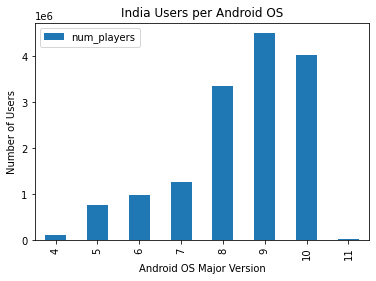

In [181]:
india_android.sort_values(by='OS_Major', ascending=False).groupby('OS_Major').sum().plot(kind='bar');
plt.ylabel('Number of Users')
plt.xlabel('Android OS Major Version')
plt.title('India Users per Android OS');